In [304]:
import pandas as pd

In [305]:
data1 = pd.read_csv("Datasets/Hinglish/trac_2022_annotator_7_dev_E.csv")
data2 = pd.read_csv("Datasets/Hinglish/trac_2022_annotator_8_dev_E.csv")

In [306]:
data = pd.concat([data1, data2])
data.reset_index(inplace=True)

In [307]:
data = data.drop(["index", "Unnamed: 0", "id"], axis=1)

In [308]:
data

text Aggression  \
0     Mujhe Garv hai ki mera janm hindu dharm mein h...        CAG   
1     Our PM Modi Ban HALALA in India.  But due to p...        OAG   
2                       In Islam There is 4women =1Men.        NAG   
3     In Hinduism There is no Prophet means no Backc...        OAG   
4        Inme koi bhi muslim aurat nhi kutto sudhar jao        OAG   
...                                                 ...        ...   
2614  @Satyam Maurya tumara hindu dharm kachra hai j...        OAG   
2615                  Duniya ka sabse ghatiya dharm hai        OAG   
2616  Pakistani mulhid YouTube channel ghalib kamal ...        NAG   
2617  @Sayaz Ahemad bo bebkoof insan hai mentally pa...        OAG   
2618                      @Vikram Kumar kya Hua bhaijan        NAG   

     Aggression Intensity Discursive Role Gender Bias Communal Bias  \
0                    NtAG             NaN        NGEN           COM   
1                    NtAG             NaN         GEN           COM   
2                     NaN             NaN        NGEN          NCOM   
3                    CuAG             NaN        NGEN           COM   
4                    CuAG             NaN        NGEN          NCOM   
...                   ...             ...         ...           ...   
2614                 NtAG             ATK         GEN           COM   
2615                 NtAG             NaN        NGEN           COM   
2616                  NaN             NaN        NGEN          NCOM   
2617                 NtAG             ATK        NGEN          NCOM   
2618                  NaN             NaN        NGEN          NCOM   

     Caste/Class Bias Ethnicity/ Racial Bias  
0                NCAS                   NETH  
1                NCAS                   NETH  
2                NCAS                   NETH  
3                NCAS                   NETH  
4                NCAS                   NETH  
...               ...                    ...  
2614             NCAS                   NETH  
2615             NCAS                   NETH  
2616             NCAS                   NETH  
2617             NCAS                   NETH  
2618             NCAS                   NETH  

[2619 rows x 8 columns]

### Transliteration of all pure hindi, code mixed data and text containing mix of pure hindi and english words to pure hindi text
Took approximately 11mins for 2.6k data

In [309]:
from indictrans import Transliterator

def lan_change(text):
    trn = Transliterator(source='hin', target='eng', build_lookup=True)
    eng = trn.transform(text)
    trn = Transliterator(source='eng', target='hin')
    hin_ = trn.transform(eng)
    return hin_

In [310]:
for i in range(len(data)):
    data["text"][i:i+1] = data["text"][i:i+1].apply(lan_change)
    print(data["text"][i:i+1])
    

0    मुझे गर्व हैं की मेरा जन्म हिन्दू धर्म मैं हुआ...
Name: text, dtype: object
1    और प्म मोदी बन हलाला इन इंडिया.  बुत दू तो पूर...
Name: text, dtype: object
2    इन इस्लाम तेरे इस 4वोमेन =1में.
Name: text, dtype: object
3    इन हिंदू तेरे इस नो प्रोफ़ेट मींस नो बकओडी.  स...
Name: text, dtype: object
4    इनमें कोई भी मुस्लिम औरत न्ही कुत्तो सुधार जाओ
Name: text, dtype: object
5    वह भाई वह क्या रूल हैं 😂😂
Name: text, dtype: object
6    हलाला मे मज लेते रहो वह इस्लाम
Name: text, dtype: object
7    एक भी लैंडया नहीं हैं.  कमेंट में
Name: text, dtype: object
8    जय श्री राम🙏🙏🙏
Name: text, dtype: object
9    हिन्दू ..❤️ हिन्दुस्तान... ❤️
Name: text, dtype: object
10    ऐसे हलाला करते, करवते रहोंगी तो पाकिस्तान की त...
Name: text, dtype: object
11    आम प्रौड़ आम हिन्दू 🌹
Name: text, dtype: object
12    औरत तो औरत हैं, जिस मर्ज़ी जात की हो,
Name: text, dtype: object
13    वेरी सड 😔, कुछ लोग यह नयी सोचते, उस औरत क ऊपर ...
Name: text, dtype: object
14    चुटिया सब इस्लाम को मजक बना रखा

### Translation of pure hindi text to english text

This takes approximately 35 mins for 2.6k data

Need to think of the multiprocessor approach if it takes lot of time

In [311]:
from googletrans import Translator

def translate_hindi_to_english(text):
    try:
        translator = Translator()
        translation = translator.translate(text, src='hi', dest='en')
        return translation.text
    except Exception as e:
        print(f"Translation failed: {e}")
        return None

In [312]:
for i in range(len(data)):
    data["text"][i:i+1] = data["text"][i:i+1].apply(translate_hindi_to_english)
    print(data["text"][i:i+1])

0    I am proud that I was born in Hinduism
Name: text, dtype: object
1    And Pm Modi became Halala in India.To fetish, ...
Name: text, dtype: object
2    These Islam in this 4 Voane = 1.
Name: text, dtype: object
3    These Hindus are your No Profit Means No Bakod...
Name: text, dtype: object
4    There is no Muslim woman in them, go to the dogs
Name: text, dtype: object
5    Brother, what is that rule?
Name: text, dtype: object
6    Keep taking up in Halala that Islam
Name: text, dtype: object
7    There is not a single landya.In comment
Name: text, dtype: object
8    Jai Shri Rama
Name: text, dtype: object
9    Hindu .. Hindustan ...
Name: text, dtype: object
10    If you keep doing such hallas, they will be bo...
Name: text, dtype: object
11    Common primary Hindu Hindu
Name: text, dtype: object
12    A woman is a woman, the wish of the caste,
Name: text, dtype: object
13    Very road, some people would think of this new...
Name: text, dtype: object
14    Chutia has kept Islam a 

In [313]:
data

text Aggression  \
0                I am proud that I was born in Hinduism        CAG   
1     And Pm Modi became Halala in India.To fetish, ...        OAG   
2                      These Islam in this 4 Voane = 1.        NAG   
3     These Hindus are your No Profit Means No Bakod...        OAG   
4      There is no Muslim woman in them, go to the dogs        OAG   
...                                                 ...        ...   
2614  @Satyam Maurya Tumara is a Hindu religion garb...        OAG   
2615                      The world's worst religion is        OAG   
2616  Pakistani Mulid Yutube Channel Ghalib Kamal Yu...        NAG   
2617  @Sayaj Ahemad Bo Bibkuf is a person mentally p...        OAG   
2618                     @What happened to Vikram Kumar        NAG   

     Aggression Intensity Discursive Role Gender Bias Communal Bias  \
0                    NtAG             NaN        NGEN           COM   
1                    NtAG             NaN         GEN           COM   
2                     NaN             NaN        NGEN          NCOM   
3                    CuAG             NaN        NGEN           COM   
4                    CuAG             NaN        NGEN          NCOM   
...                   ...             ...         ...           ...   
2614                 NtAG             ATK         GEN           COM   
2615                 NtAG             NaN        NGEN           COM   
2616                  NaN             NaN        NGEN          NCOM   
2617                 NtAG             ATK        NGEN          NCOM   
2618                  NaN             NaN        NGEN          NCOM   

     Caste/Class Bias Ethnicity/ Racial Bias  
0                NCAS                   NETH  
1                NCAS                   NETH  
2                NCAS                   NETH  
3                NCAS                   NETH  
4                NCAS                   NETH  
...               ...                    ...  
2614             NCAS                   NETH  
2615             NCAS                   NETH  
2616             NCAS                   NETH  
2617             NCAS                   NETH  
2618             NCAS                   NETH  

[2619 rows x 8 columns]

In [314]:
import re
import nltk
from nltk.util import pr
stemmer = nltk.SnowballStemmer('english')
# nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhinavreddy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [315]:
data

text Aggression  \
0                I am proud that I was born in Hinduism        CAG   
1     And Pm Modi became Halala in India.To fetish, ...        OAG   
2                      These Islam in this 4 Voane = 1.        NAG   
3     These Hindus are your No Profit Means No Bakod...        OAG   
4      There is no Muslim woman in them, go to the dogs        OAG   
...                                                 ...        ...   
2614  @Satyam Maurya Tumara is a Hindu religion garb...        OAG   
2615                      The world's worst religion is        OAG   
2616  Pakistani Mulid Yutube Channel Ghalib Kamal Yu...        NAG   
2617  @Sayaj Ahemad Bo Bibkuf is a person mentally p...        OAG   
2618                     @What happened to Vikram Kumar        NAG   

     Aggression Intensity Discursive Role Gender Bias Communal Bias  \
0                    NtAG             NaN        NGEN           COM   
1                    NtAG             NaN         GEN           COM   
2                     NaN             NaN        NGEN          NCOM   
3                    CuAG             NaN        NGEN           COM   
4                    CuAG             NaN        NGEN          NCOM   
...                   ...             ...         ...           ...   
2614                 NtAG             ATK         GEN           COM   
2615                 NtAG             NaN        NGEN           COM   
2616                  NaN             NaN        NGEN          NCOM   
2617                 NtAG             ATK        NGEN          NCOM   
2618                  NaN             NaN        NGEN          NCOM   

     Caste/Class Bias Ethnicity/ Racial Bias  
0                NCAS                   NETH  
1                NCAS                   NETH  
2                NCAS                   NETH  
3                NCAS                   NETH  
4                NCAS                   NETH  
...               ...                    ...  
2614             NCAS                   NETH  
2615             NCAS                   NETH  
2616             NCAS                   NETH  
2617             NCAS                   NETH  
2618             NCAS                   NETH  

[2619 rows x 8 columns]

In [316]:
data.to_csv("dev.csv")

In [317]:
new_data = pd.read_csv("dev.csv")

In [318]:
data = pd.DataFrame()
data['text'] = new_data['text']
data['Aggression'] = new_data['Aggression']

In [319]:
data

text Aggression
0                I am proud that I was born in Hinduism        CAG
1     And Pm Modi became Halala in India.To fetish, ...        OAG
2                      These Islam in this 4 Voane = 1.        NAG
3     These Hindus are your No Profit Means No Bakod...        OAG
4      There is no Muslim woman in them, go to the dogs        OAG
...                                                 ...        ...
2614  @Satyam Maurya Tumara is a Hindu religion garb...        OAG
2615                      The world's worst religion is        OAG
2616  Pakistani Mulid Yutube Channel Ghalib Kamal Yu...        NAG
2617  @Sayaj Ahemad Bo Bibkuf is a person mentally p...        OAG
2618                     @What happened to Vikram Kumar        NAG

[2619 rows x 2 columns]

### Removing NULL values. 
Google Translator is not able to translate few texts due to more than 5000 length of text or might be due to error when this api is called. This will result in NULL value in place of text|

In [320]:
data['text'].isnull().sum()

11

In [321]:
data.dropna(inplace=True)
data.reset_index(inplace=True)

In [322]:
data = data.drop(['index'], axis=1)

In [323]:
data

text Aggression
0                I am proud that I was born in Hinduism        CAG
1     And Pm Modi became Halala in India.To fetish, ...        OAG
2                      These Islam in this 4 Voane = 1.        NAG
3     These Hindus are your No Profit Means No Bakod...        OAG
4      There is no Muslim woman in them, go to the dogs        OAG
...                                                 ...        ...
2603  @Satyam Maurya Tumara is a Hindu religion garb...        OAG
2604                      The world's worst religion is        OAG
2605  Pakistani Mulid Yutube Channel Ghalib Kamal Yu...        NAG
2606  @Sayaj Ahemad Bo Bibkuf is a person mentally p...        OAG
2607                     @What happened to Vikram Kumar        NAG

[2608 rows x 2 columns]

### Expanding English Contractions
Took 148 different english contractions from wikipedia. This will expand the english contraction words with their actual meaning. Data of english contractions is stored in english_contractions.py file.

In [324]:
from english_contractions import eng_cont

In [325]:
def expand_contractions(text):
    text = str(text).lower()
    contractions = eng_cont
    pattern = re.compile(r'\b(' + '|'.join(contractions.keys()) + r')\b')

    def expand_match(contraction):
        match = contraction.group(0)
        expanded_match = contractions.get(match)
        return expanded_match

    expanded_text = pattern.sub(expand_match, text)

    return expanded_text

data['text'] = data['text'].apply(expand_contractions)

text = "I can't believe it's raining today."
expanded_text = expand_contractions(text)
print(expanded_text)

i cannot believe it is raining today.


### Some basic data Preprocessing steps

In [326]:
def clean(text):
  text = re.sub('\[.*?\]', '', text)      # Removes any words present in square brackets
  text = re.sub('https?://\S+|www\.\S+', '', text)  # Removes any website URLS, which start with either http, https, www.com
  text = re.sub('<.*?>+', '', text)       # Removes any html tags
  text = re.sub(r'#\w+', '', text)        # Removes any hashtags mentioned which starts with # and replaces it with HASHTAG_HERE
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)   #Removes any punctuation marks.
  text = re.sub(r'@([A-Za-z0-9_]+)', '', text)    # Removes any usernames mentioned
  text = re.sub('\n', '', text)           #Removes any new line tags
  text = re.sub('\w*\d\w*', '', text)     #Removes alphanumeric strings
  #This part will reduce the size of elongated words. E.g : Helloooooooooo to Hello
  pattern = re.compile(r"(.)\1{2,}")
  words = text.split()
  reduced_words = []
  for word in words:
      reduced_word = pattern.sub(r"\1\1", word)
      reduced_words.append(reduced_word)
  text = ' '.join(reduced_words)

  return text

print(clean("Hey @john_doe, did you see @mary_smith's post? It was amazing!"))
data['text'] = data['text'].apply(clean)

Hey johndoe did you see marysmiths post It was amazing


In [327]:
data

text Aggression
0                i am proud that i was born in hinduism        CAG
1     and pm modi became halala in indiato fetish th...        OAG
2                             these islam in this voane        NAG
3     these hindus are your no profit means no bakod...        OAG
4       there is no muslim woman in them go to the dogs        OAG
...                                                 ...        ...
2603  satyam maurya tumara is a hindu religion garba...        OAG
2604                      the worldis worst religion is        OAG
2605  pakistani mulid yutube channel ghalib kamal yu...        NAG
2606  sayaj ahemad bo bibkuf is a person mentally pa...        OAG
2607                      what happened to vikram kumar        NAG

[2608 rows x 2 columns]

### Mapping emoticons made by user with their actual meaning.
Took 30 different emoticons which can be made by a user. This will replace emoticons present in the text with their actual meaning. Emoticons data is stored in english_emoticons.py file.

In [328]:
from english_emoticons import emoticon_mapping

In [329]:
def replace_emoticons(text):
    emoticon_pattern = re.compile(r'(' + '|'.join(re.escape(emoticon) for emoticon in emoticon_mapping.keys()) + r')')
    return emoticon_pattern.sub(lambda x: emoticon_mapping[x.group()], text)

print(replace_emoticons('hello :('))
data['text'] = data['text'].apply(replace_emoticons)

hello [sad_emoticon]


### Mapping available emojis in social media sites with their actual meaning.
Collected all emojis present in our dataset. Used unicode and emoji library to replace emoji with their actual meaning

In [330]:
import pandas as pd
import re

def find_emojis_in_text(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"  # other miscellaneous symbols
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    emojis = re.findall(emoji_pattern, text)
    return emojis

def find_individual_emojis_in_dataframe(df, column):
    emojis = set()
    for text in df[column]:
        text_emojis = find_emojis_in_text(text)
        for emoji in text_emojis:
            emojis.add(emoji)
    return list(emojis)


emojis = find_individual_emojis_in_dataframe(data, "text")
final_emojis = set()
for i in range(len(emojis)):
    for j in range(len(emojis[i])):
        final_emojis.add(emojis[i][j])
final_emojis = list(final_emojis)
print(final_emojis)
print(len(final_emojis))


['𝗌', '😀', '😜', '😍', '🐷', '😂', '𝗇', '😡', '𝗅', '👿', '⛳', '👏', '😏', '🙏', '𝗈', '😛', '🙂', '𝗋', '𝗍', '𝗂', '️', '🕋', '𝖬', '☝', '😅', '😘', '💯', '𝖾', '😥', '😤', '😉', '🚩', '😱', '😵', '😔', '🖕', '🌍', '💓', '🏻', '👎', '😇', '😭', '👢', '😞', '😙', '𝗉', '🙄', '𝖺', '💩', '𝖼', '𝗐', '𝗄', '🐖', '𝖭', '𝗆', '𝗎', '😁', '😠', '👇']
59


In [331]:
import unicodedata
import emoji

def get_emoji_info(emoji_character):
    try:
        emoji_name = unicodedata.name(emoji_character)
        return emoji_name
    except:
        return None

def replace_emojis_with_meanings(tweet):
    replaced_tweet = ''
    for char in tweet:
        if char in final_emojis:
            emoji_info = get_emoji_info(char)
            if emoji_info:
                replaced_tweet += f"[{emoji_info}]"
        else:
            replaced_tweet += char
    return replaced_tweet


# List of tweets containing emojis
tweets = data['text'].tolist()
replaced_tweets = []

# Replace emojis with their meanings in each tweet
for tweet in tweets:
    new_tweet = replace_emojis_with_meanings(tweet)
    replaced_tweets.append(new_tweet)
    print(new_tweet)

data = data.drop(['text'], axis=1)
data['text'] = replaced_tweets


i am proud that i was born in hinduism
and pm modi became halala in indiato fetish the whole literacy muslim girls don
these islam in this voane
these hindus are your no profit means no bakodisanatan dharma mein iteranal path
there is no muslim woman in them go to the dogs
brother what is that rule
keep taking up in halala that islam
there is not a single landyain comment
jai shri rama
hindu hindustan
if you keep doing such hallas they will be born like pakistan
common primary hindu hindu
a woman is a woman the wish of the caste
very road some people would think of this new you would do it on that woman some people play with the womanis life for money
chutia has kept islam a lot
halala means ghapa ghap
halala is not in islam which these muslim women are talking aboutthese are a conspiracy to discredit muslims
ahlebath muhammad savthe religion does not believe in triple talaq and halala
these muslims go back to the tallak again why are they going to the second century then stay with him

In [332]:
data

Aggression                                               text
0           CAG             i am proud that i was born in hinduism
1           OAG  and pm modi became halala in indiato fetish th...
2           NAG                          these islam in this voane
3           OAG  these hindus are your no profit means no bakod...
4           OAG    there is no muslim woman in them go to the dogs
...         ...                                                ...
2603        OAG  satyam maurya tumara is a hindu religion garba...
2604        OAG                      the worldis worst religion is
2605        NAG  pakistani mulid yutube channel ghalib kamal yu...
2606        OAG  sayaj ahemad bo bibkuf is a person mentally pa...
2607        NAG                      what happened to vikram kumar

[2608 rows x 2 columns]

In [333]:
data

Aggression                                               text
0           CAG             i am proud that i was born in hinduism
1           OAG  and pm modi became halala in indiato fetish th...
2           NAG                          these islam in this voane
3           OAG  these hindus are your no profit means no bakod...
4           OAG    there is no muslim woman in them go to the dogs
...         ...                                                ...
2603        OAG  satyam maurya tumara is a hindu religion garba...
2604        OAG                      the worldis worst religion is
2605        NAG  pakistani mulid yutube channel ghalib kamal yu...
2606        OAG  sayaj ahemad bo bibkuf is a person mentally pa...
2607        NAG                      what happened to vikram kumar

[2608 rows x 2 columns]

### Censoring of offensive kind of words
This will censor all offensive words with **** symbols which is used in many websites and gaming platforms. Used better_profanity library to do this job

In [334]:
from better_profanity import profanity
  
# text to be censored
def censoring(text):
    censored = profanity.censor(text)
    return censored
# do censoring
for i in range(len(data)):
    data["text"][i:i+1] = data["text"][i:i+1].apply(censoring)
    print(data['text'][i:i+1])


0    i am proud that i was born in hinduism
Name: text, dtype: object
1    and pm modi became halala in indiato fetish th...
Name: text, dtype: object
2    these islam in this voane
Name: text, dtype: object
3    these hindus are your no profit means no bakod...
Name: text, dtype: object
4    there is no muslim woman in them go to the dogs
Name: text, dtype: object
5    brother what is that rule
Name: text, dtype: object
6    keep taking up in halala that islam
Name: text, dtype: object
7    there is not a single landyain comment
Name: text, dtype: object
8    jai shri rama
Name: text, dtype: object
9    hindu hindustan
Name: text, dtype: object
10    if you keep doing such hallas they will be bor...
Name: text, dtype: object
11    common primary hindu hindu
Name: text, dtype: object
12    a woman is a woman the wish of the caste
Name: text, dtype: object
13    very road some people would think of this new ...
Name: text, dtype: object
14    chutia has kept islam a lot
Name: text, dtyp

In [335]:
data['Aggression'].value_counts()

Aggression
OAG    1605
NAG     548
CAG     455
Name: count, dtype: int64

In [336]:
data = data.drop_duplicates('text')


In [337]:
data['Aggression'] = data['Aggression'].map({"OAG" : 2, "CAG": 1, "NAG" : 0})

/var/folders/z_/68bc0ggj7nx_ngp9z73f7tq80000gn/T/ipykernel_1050/3089331597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Aggression'] = data['Aggression'].map({"OAG" : 2, "CAG": 1, "NAG" : 0})


In [448]:
NAG_tweets = data[data.Aggression == 0]
CAG_tweets = data[data.Aggression == 1]
OAG_tweets = data[data.Aggression == 2]

In [339]:
!pip install wordcloud

### Analysing what kind of words 

In [340]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

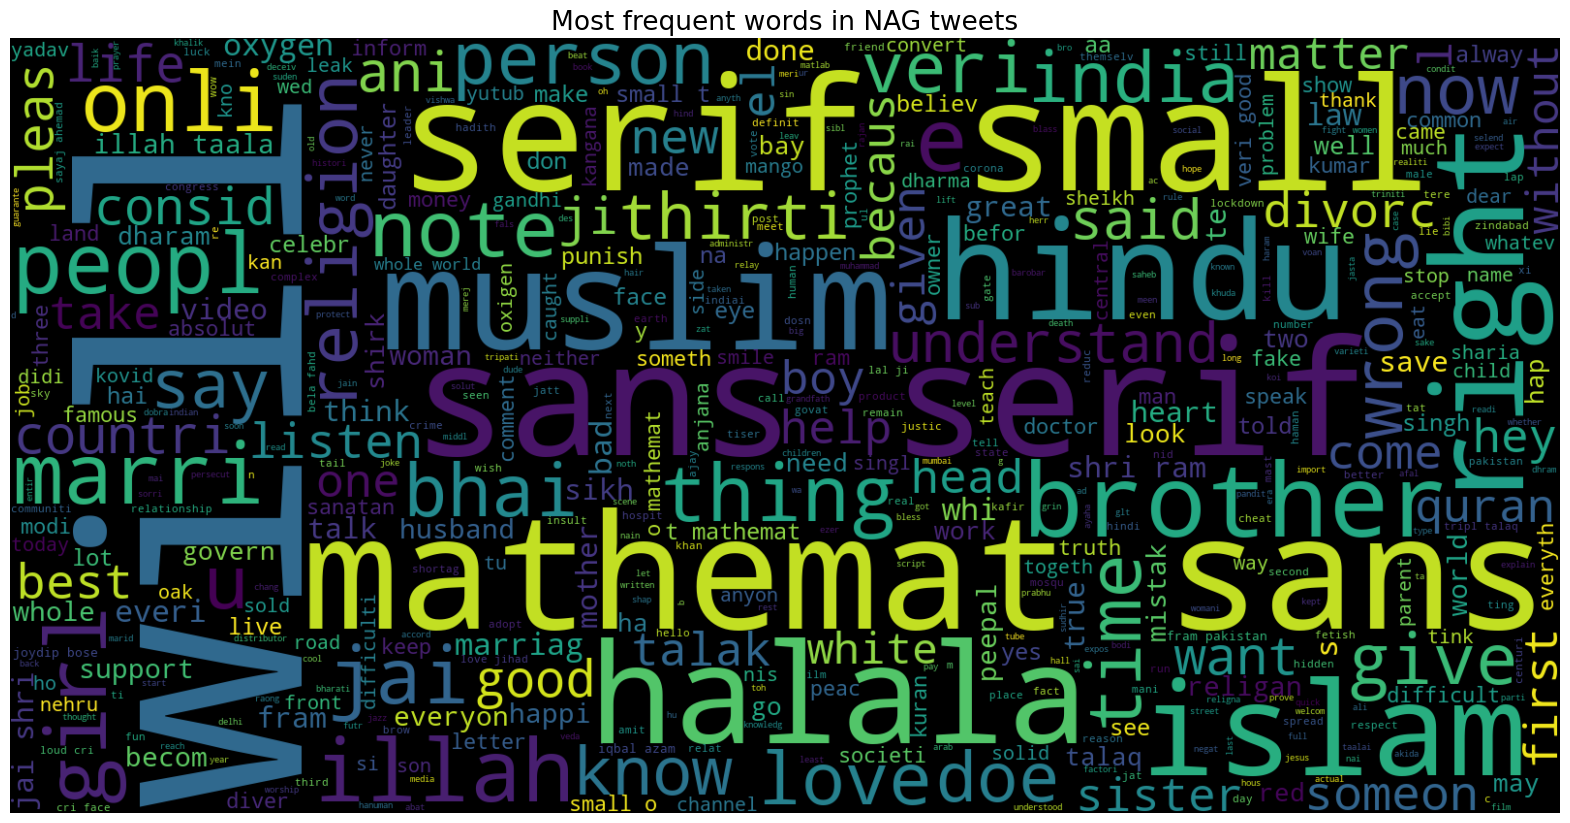

In [451]:
text = ' '.join([word for word in NAG_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in NAG tweets', fontsize = 19)
plt.show()

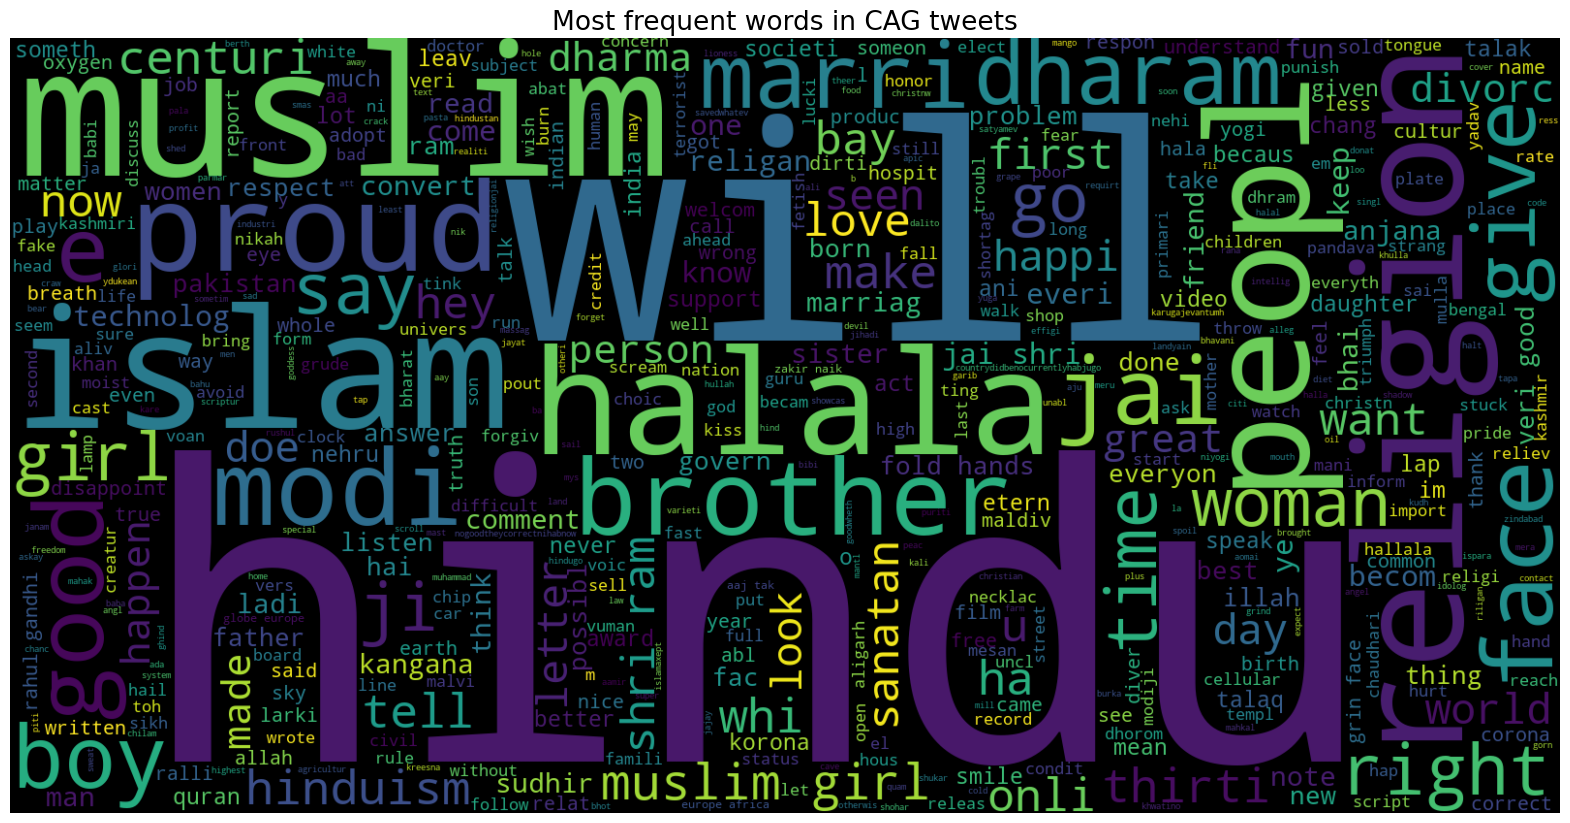

In [452]:
text = ' '.join([word for word in CAG_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in CAG tweets', fontsize = 19)
plt.show()

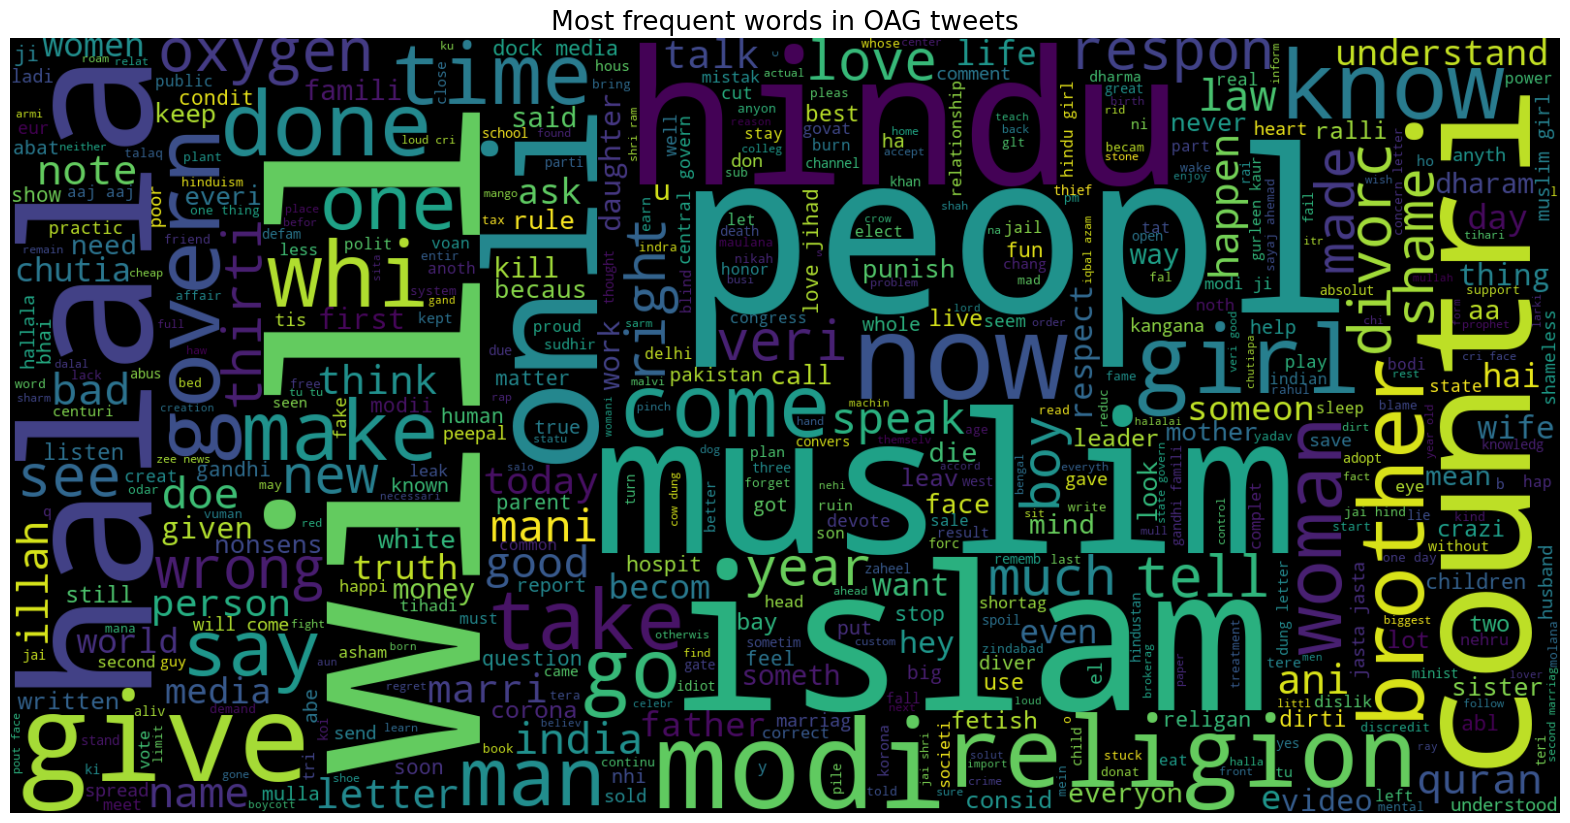

In [453]:
text = ' '.join([word for word in OAG_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in OAG tweets', fontsize = 19)
plt.show()

### Applied stemming

In [343]:
stemmer = nltk.SnowballStemmer('english')

In [344]:
def stemming(text):
    text = [stemmer.stem(word.lower()) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [345]:
data['text'] = data['text'].apply(stemming)

/var/folders/z_/68bc0ggj7nx_ngp9z73f7tq80000gn/T/ipykernel_1050/725934016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(stemming)


In [346]:
!pip install gensim

### Applied Word2Vec using gensim to capture the meaning of the text

In [347]:
import gensim
from gensim.models import Word2Vec, KeyedVectors

In [348]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')
vec_king = wv['king']
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [349]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [350]:
corpus = data['text'].tolist()

In [351]:
[[i,j,k] for i,j,k in zip(list(map(len,corpus)),corpus, data['text']) if i<1]

[[0, '', '']]

In [352]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abhinavreddy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [353]:
words = []
for sent in corpus:
  sent_token = sent_tokenize(sent)
  for sent in sent_token:
    words.append(simple_preprocess(sent))

In [354]:
model = Word2Vec(words)
model.wv.index_to_key

['the',
 'is',
 'of',
 'to',
 'and',
 'you',
 'are',
 'in',
 'not',
 'this',
 'will',
 'it',
 'be',
 'do',
 'that',
 'have',
 'hindu',
 'muslim',
 'for',
 'peopl',
 'then',
 'these',
 'islam',
 'with',
 'who',
 'all',
 'has',
 'halala',
 'on',
 'there',
 'if',
 'was',
 'what',
 'your',
 'also',
 'girl',
 'no',
 'should',
 'so',
 'he',
 'brother',
 'modi',
 'religion',
 'onli',
 'we',
 'from',
 'countri',
 'they',
 'give',
 'by',
 'their',
 'now',
 'but',
 'get',
 'govern',
 'know',
 'come',
 'how',
 'his',
 'or',
 'right',
 'time',
 'like',
 'whi',
 'love',
 'about',
 'good',
 'jai',
 'did',
 'one',
 'done',
 'such',
 'veri',
 'been',
 'am',
 'say',
 'illah',
 'go',
 'make',
 'them',
 'take',
 'woman',
 'can',
 'marri',
 'my',
 'face',
 'our',
 'when',
 'man',
 'divorc',
 'letter',
 'thirti',
 'wrong',
 'me',
 'boy',
 'doe',
 'at',
 'note',
 'oxygen',
 'would',
 'some',
 'mathemat',
 'serif',
 'sans',
 'thing',
 'india',
 'small',
 'tell',
 'other',
 'as',
 'person',
 'see',
 'she',
 '

In [355]:
model.corpus_count

2553

In [356]:
model.epochs

5

In [357]:
model.save('word2vec_model.bin')

In [358]:
import numpy as np

In [359]:
model = Word2Vec.load("word2vec_model.bin")

In [360]:
def avg_word2vec(doc):
  return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key], axis=0)

In [361]:
!pip install tqdm

In [362]:
from tqdm import tqdm

In [363]:
x = []
for i in tqdm(range(len(words))):
  x.append(avg_word2vec(words[i]))

  0%|          | 0/2553 [00:00<?, ?it/s]/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 2553/2553 [00:00<00:00, 23200.87it/s]


In [364]:
len(x)

2553

In [365]:
x[0]

array([-9.31933597e-02,  2.10566059e-01,  5.83549105e-02,  5.66110946e-02,
        9.71493870e-02, -2.91196406e-01,  1.30502507e-01,  5.86652696e-01,
       -2.78140962e-01, -6.16313703e-02, -4.59119305e-03, -4.39583838e-01,
        9.77826398e-03,  1.70539334e-01,  7.30442628e-02, -1.13492645e-01,
        1.09616615e-01, -2.92503059e-01, -7.41643831e-02, -6.11578286e-01,
        8.23779106e-02,  1.74188003e-01,  1.50012478e-01, -9.51475129e-02,
       -9.15456489e-02,  1.42864674e-01, -2.89616585e-01, -1.09971903e-01,
       -1.71586409e-01, -4.61866934e-04,  2.64577001e-01, -8.60543475e-02,
        1.44892380e-01, -3.18773359e-01, -2.08690673e-01,  4.60510433e-01,
        1.59515008e-01, -2.57400632e-01, -1.02873445e-01, -3.99133474e-01,
       -1.17941685e-01, -1.23604484e-01, -1.82359785e-01,  4.53241207e-02,
        2.89486885e-01, -5.22930697e-02, -3.56249124e-01,  5.82707189e-02,
        2.72650510e-01,  6.26163930e-02,  7.28732497e-02, -2.17826203e-01,
        2.55368855e-02, -

In [366]:
type(x[0])

numpy.ndarray

In [406]:
y = data[list(map(lambda x: len(x)>0 ,corpus))]
y= y['Aggression'].to_numpy()
print(y)

[1 2 0 ... 0 2 0]


In [407]:
y.shape

(2553,)

In [408]:
import pandas as pd

data1 = pd.DataFrame()
for i in range(len(x)):
    data1 = pd.concat([data1, pd.DataFrame(x[i].reshape(1, -1))], ignore_index=True)

In [409]:
data1

0         1         2         3         4         5         6   \
0    -0.093193  0.210566  0.058355  0.056611  0.097149 -0.291196  0.130503   
1    -0.098998  0.219170  0.058107  0.064367  0.091786 -0.293385  0.131811   
2    -0.110086  0.247774  0.061402  0.078512  0.098298 -0.329085  0.145705   
3    -0.096757  0.223663  0.057510  0.065128  0.089763 -0.295021  0.136103   
4    -0.118871  0.262007  0.064019  0.072823  0.108002 -0.344411  0.156075   
...        ...       ...       ...       ...       ...       ...       ...   
2548 -0.109835  0.237798  0.060057  0.069420  0.098383 -0.316378  0.142475   
2549 -0.135291  0.291567  0.068811  0.083975  0.122593 -0.388716  0.174179   
2550 -0.034705  0.086708  0.029437  0.022262  0.040869 -0.117202  0.054941   
2551 -0.109619  0.239274  0.058468  0.068555  0.098829 -0.316911  0.141783   
2552 -0.093562  0.202457  0.047226  0.053011  0.086030 -0.268508  0.114189   

            7         8         9   ...        90        91        92  \
0     0.586653 -0.278141 -0.061631  ...  0.307587  0.110119  0.056783   
1     0.598840 -0.286965 -0.062704  ...  0.313340  0.109510  0.064440   
2     0.674831 -0.323722 -0.069032  ...  0.350242  0.126468  0.069421   
3     0.609007 -0.290713 -0.060527  ...  0.315248  0.112140  0.063523   
4     0.708214 -0.333935 -0.070541  ...  0.366272  0.131312  0.074648   
...        ...       ...       ...  ...       ...       ...       ...   
2548  0.657006 -0.312085 -0.066340  ...  0.337395  0.120759  0.072476   
2549  0.804298 -0.377759 -0.079141  ...  0.405382  0.143960  0.086184   
2550  0.244053 -0.114825 -0.023101  ...  0.126458  0.043586  0.018326   
2551  0.651649 -0.312080 -0.069157  ...  0.335560  0.120624  0.066364   
2552  0.543029 -0.253459 -0.060839  ...  0.278070  0.103226  0.058656   

            93        94        95        96        97        98        99  
0     0.000599  0.649679  0.203295  0.166153 -0.157053  0.145053 -0.118799  
1    -0.001592  0.662453  0.205855  0.171326 -0.162665  0.149634 -0.122576  
2     0.003073  0.748448  0.230882  0.186516 -0.178955  0.167537 -0.132940  
3     0.000424  0.669724  0.209930  0.173472 -0.161496  0.153199 -0.117803  
4    -0.000650  0.782352  0.243609  0.201869 -0.191797  0.170412 -0.141219  
...        ...       ...       ...       ...       ...       ...       ...  
2548  0.001128  0.722401  0.221355  0.182347 -0.177334  0.156568 -0.126999  
2549 -0.004848  0.880779  0.267404  0.224178 -0.217670  0.186780 -0.158292  
2550 -0.001917  0.255757  0.087827  0.066470 -0.063358  0.063525 -0.054320  
2551  0.000435  0.716417  0.223583  0.186098 -0.174683  0.157489 -0.124982  
2552 -0.004445  0.596076  0.183535  0.158116 -0.148135  0.136506 -0.108854  

[2553 rows x 100 columns]

In [410]:
data1['labels']=y

In [411]:
data1

0         1         2         3         4         5         6  \
0    -0.093193  0.210566  0.058355  0.056611  0.097149 -0.291196  0.130503   
1    -0.098998  0.219170  0.058107  0.064367  0.091786 -0.293385  0.131811   
2    -0.110086  0.247774  0.061402  0.078512  0.098298 -0.329085  0.145705   
3    -0.096757  0.223663  0.057510  0.065128  0.089763 -0.295021  0.136103   
4    -0.118871  0.262007  0.064019  0.072823  0.108002 -0.344411  0.156075   
...        ...       ...       ...       ...       ...       ...       ...   
2548 -0.109835  0.237798  0.060057  0.069420  0.098383 -0.316378  0.142475   
2549 -0.135291  0.291567  0.068811  0.083975  0.122593 -0.388716  0.174179   
2550 -0.034705  0.086708  0.029437  0.022262  0.040869 -0.117202  0.054941   
2551 -0.109619  0.239274  0.058468  0.068555  0.098829 -0.316911  0.141783   
2552 -0.093562  0.202457  0.047226  0.053011  0.086030 -0.268508  0.114189   

             7         8         9  ...        91        92        93  \
0     0.586653 -0.278141 -0.061631  ...  0.110119  0.056783  0.000599   
1     0.598840 -0.286965 -0.062704  ...  0.109510  0.064440 -0.001592   
2     0.674831 -0.323722 -0.069032  ...  0.126468  0.069421  0.003073   
3     0.609007 -0.290713 -0.060527  ...  0.112140  0.063523  0.000424   
4     0.708214 -0.333935 -0.070541  ...  0.131312  0.074648 -0.000650   
...        ...       ...       ...  ...       ...       ...       ...   
2548  0.657006 -0.312085 -0.066340  ...  0.120759  0.072476  0.001128   
2549  0.804298 -0.377759 -0.079141  ...  0.143960  0.086184 -0.004848   
2550  0.244053 -0.114825 -0.023101  ...  0.043586  0.018326 -0.001917   
2551  0.651649 -0.312080 -0.069157  ...  0.120624  0.066364  0.000435   
2552  0.543029 -0.253459 -0.060839  ...  0.103226  0.058656 -0.004445   

            94        95        96        97        98        99  labels  
0     0.649679  0.203295  0.166153 -0.157053  0.145053 -0.118799       1  
1     0.662453  0.205855  0.171326 -0.162665  0.149634 -0.122576       2  
2     0.748448  0.230882  0.186516 -0.178955  0.167537 -0.132940       0  
3     0.669724  0.209930  0.173472 -0.161496  0.153199 -0.117803       2  
4     0.782352  0.243609  0.201869 -0.191797  0.170412 -0.141219       2  
...        ...       ...       ...       ...       ...       ...     ...  
2548  0.722401  0.221355  0.182347 -0.177334  0.156568 -0.126999       2  
2549  0.880779  0.267404  0.224178 -0.217670  0.186780 -0.158292       2  
2550  0.255757  0.087827  0.066470 -0.063358  0.063525 -0.054320       0  
2551  0.716417  0.223583  0.186098 -0.174683  0.157489 -0.124982       2  
2552  0.596076  0.183535  0.158116 -0.148135  0.136506 -0.108854       0  

[2553 rows x 101 columns]

In [412]:
x1 = data1.drop(['labels'], axis=1)
y = data1['labels']

In [413]:
data

Aggression                                               text
0              1             i am proud that i was born in hinduism
1              2  and pm modi becam halala in indiato fetish the...
2              0                           these islam in this voan
3              2  these hindus are your no profit mean no bakodi...
4              2     there is no muslim woman in them go to the dog
...          ...                                                ...
2603           2  satyam maurya tumara is a hindu religion garba...
2604           2                       the worldi worst religion is
2605           0  pakistani mulid yutub channel ghalib kamal yut...
2606           2  sayaj ahemad bo bibkuf is a person mental pati...
2607           0                        what happen to vikram kumar

[2554 rows x 2 columns]

In [414]:
from sklearn.model_selection import train_test_split

In [415]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.33, random_state = 101)

In [379]:
!pip install xgboost

In [416]:
from xgboost import XGBClassifier

In [417]:
model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [418]:
from sklearn.metrics import accuracy_score

In [419]:
accuracy = accuracy_score(y_test, y_pred)
accuracy 

0.6061684460260973

### Applied Fasttext to deal with spellings and morphological aspects

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp311-cp311-macosx_13_0_arm64.whl size=330220 sha256=6f3a02558e50072b497600788ac937864e3f68b5b77be5a7bd12b94f8b2935dd
  Stored in directory: /Users/abhinavreddy/Library/Caches/pip/wheels/12/89/c9/c932d04c4dd65abe347bbb3e6f7668688753cbc585305ad8b7
Successfully built fasttext


In [420]:
sentences = data['text'].tolist()
word_list = []
for li in words:
  for l in li:
    word_list.append(l)
word_list

['am',
 'proud',
 'that',
 'was',
 'born',
 'in',
 'hinduism',
 'and',
 'pm',
 'modi',
 'becam',
 'halala',
 'in',
 'indiato',
 'fetish',
 'the',
 'whole',
 'literaci',
 'muslim',
 'girl',
 'don',
 'these',
 'islam',
 'in',
 'this',
 'voan',
 'these',
 'hindus',
 'are',
 'your',
 'no',
 'profit',
 'mean',
 'no',
 'bakodisanatan',
 'dharma',
 'mein',
 'iteran',
 'path',
 'there',
 'is',
 'no',
 'muslim',
 'woman',
 'in',
 'them',
 'go',
 'to',
 'the',
 'dog',
 'brother',
 'what',
 'is',
 'that',
 'rule',
 'keep',
 'take',
 'up',
 'in',
 'halala',
 'that',
 'islam',
 'there',
 'is',
 'not',
 'singl',
 'landyain',
 'comment',
 'jai',
 'shri',
 'rama',
 'hindu',
 'hindustan',
 'if',
 'you',
 'keep',
 'do',
 'such',
 'halla',
 'they',
 'will',
 'be',
 'born',
 'like',
 'pakistan',
 'common',
 'primari',
 'hindu',
 'hindu',
 'woman',
 'is',
 'woman',
 'the',
 'wish',
 'of',
 'the',
 'cast',
 'veri',
 'road',
 'some',
 'peopl',
 'would',
 'think',
 'of',
 'this',
 'new',
 'you',
 'would',
 'd

In [421]:
import fasttext
with open('train.txt', 'w') as f:
    for word in word_list:
        f.write(word + '\n')

model = fasttext.train_unsupervised('train.txt', dim=100, epoch=5)

model.save_model('fasttext_model.bin')

Read 0M words
Number of words:  864
Number of labels: 0
Progress: 100.0% words/sec/thread:  533979 lr:  0.000000 avg.loss:  4.126381 ETA:   0h 0m 0s


In [422]:
model = fasttext.load_model('fasttext_model.bin')

def get_sentence_embedding(sentence):
    words = sentence.split()
    embeddings = []
    for word in words:
        word_embedding = model.get_word_vector(word)
        embeddings.append(word_embedding)
    if embeddings:
        sentence_embedding = sum(embeddings) / len(embeddings)
        return sentence_embedding
    else:
        return None

final_embeddings = []
for i in data["text"].to_list():
    embedding = get_sentence_embedding(i)
    if embedding is not None:
        final_embeddings.append(embedding)

In [423]:
print(len(final_embeddings))

2553


In [424]:
data.shape

(2554, 2)

In [425]:
X = np.array(final_embeddings)

In [426]:
X[0]

array([ 2.0404835e-03, -1.4915705e-03,  1.5760547e-03,  4.2827439e-04,
       -4.9035251e-04, -4.6191955e-04, -1.2934464e-03,  8.7824505e-04,
       -4.6424201e-04, -1.9328751e-03, -3.8352070e-04, -1.6475436e-03,
       -1.9508770e-03, -1.0868283e-03,  5.5910047e-04,  1.5289410e-03,
       -3.3700411e-04, -1.1394781e-03,  1.2775330e-04,  1.2453352e-03,
       -8.1490980e-06, -1.2691320e-03, -9.9330780e-04,  2.0182575e-03,
       -8.2021137e-04,  5.2840955e-04, -2.1922811e-04,  7.7271921e-04,
       -7.9968180e-05, -5.8563333e-04,  2.2098443e-03,  1.2000515e-03,
        1.2233973e-03,  1.3382598e-03,  7.8908005e-04, -4.1034113e-04,
       -8.6228880e-05,  2.3997300e-03,  6.9216057e-04,  6.4623437e-04,
       -3.0084644e-03, -1.3094633e-03,  3.0808864e-04, -5.3575455e-04,
        2.9348733e-04, -1.0199400e-03,  1.1617058e-03,  2.1431362e-03,
        1.1714211e-03,  2.3353343e-04,  1.0589099e-03, -2.4233784e-03,
        1.7294692e-03, -6.5574149e-04,  1.2267940e-04,  1.5655190e-03,
      

In [427]:
y = data[list(map(lambda x: len(x)>0 ,corpus))]
y= y['Aggression'].to_numpy()

In [428]:
y.shape

(2553,)

In [429]:
# df=pd.DataFrame()
# for i in range(0,len(X)):
#     df=df.append(pd.DataFrame(X[i].reshape(1,-1)),ignore_index=True)

data2 = pd.DataFrame()
for i in range(len(x)):
    data2 = pd.concat([data2, pd.DataFrame(X[i].reshape(1, -1))], ignore_index=True)

In [430]:
data2

0         1         2         3         4         5         6   \
0     0.002040 -0.001492  0.001576  0.000428 -0.000490 -0.000462 -0.001293   
1     0.002623 -0.002029  0.002552  0.000686 -0.001428 -0.000115 -0.001791   
2     0.003782 -0.002657  0.002110  0.001361 -0.001880 -0.000094 -0.002357   
3     0.001426 -0.001038  0.001478 -0.000123 -0.000634  0.000505 -0.001362   
4     0.002437 -0.003172  0.002756  0.001154 -0.002092  0.000467 -0.002527   
...        ...       ...       ...       ...       ...       ...       ...   
2548  0.002010 -0.002507  0.002863  0.000141 -0.001393  0.000781 -0.002699   
2549  0.001795 -0.002770  0.002114  0.001718 -0.001451 -0.000344 -0.003331   
2550  0.000674 -0.000304 -0.000130 -0.000688  0.000677 -0.000291 -0.000884   
2551  0.001024 -0.001070  0.001749 -0.000067 -0.000796 -0.000386 -0.002035   
2552  0.001717 -0.001400  0.001800  0.001020  0.000082  0.001189 -0.000044   

            7         8         9   ...        90        91        92  \
0     0.000878 -0.000464 -0.001933  ... -0.002402 -0.001465 -0.002225   
1     0.000582 -0.002500 -0.001967  ... -0.002777 -0.001281 -0.002489   
2     0.001238 -0.001848 -0.003818  ... -0.002756 -0.000996 -0.002493   
3     0.000863 -0.001273 -0.001582  ... -0.002163 -0.000388 -0.001760   
4     0.000565 -0.003016 -0.003389  ... -0.003161 -0.001127 -0.002674   
...        ...       ...       ...  ...       ...       ...       ...   
2548  0.000834 -0.002526 -0.003493  ... -0.003369 -0.000928 -0.002153   
2549 -0.000266 -0.002562 -0.004353  ... -0.003439 -0.000415 -0.002757   
2550  0.000525 -0.000310 -0.000594  ... -0.001456 -0.000174 -0.000722   
2551  0.000291 -0.001204 -0.002020  ... -0.002592 -0.000703 -0.000878   
2552 -0.001969 -0.000586 -0.001982  ... -0.002051 -0.001475 -0.000782   

            93        94        95        96        97        98        99  
0     0.001568 -0.000213  0.001791 -0.001471 -0.001811  0.001644  0.000033  
1     0.002443 -0.000672  0.001185 -0.001859 -0.001917  0.001913 -0.000425  
2     0.002923 -0.000775  0.001267 -0.001907 -0.002437  0.002512  0.000156  
3     0.000487 -0.000018  0.000805 -0.001127 -0.001732  0.001558 -0.000191  
4     0.002669 -0.001345  0.002801 -0.001807 -0.002523  0.002926 -0.000285  
...        ...       ...       ...       ...       ...       ...       ...  
2548  0.003242 -0.000041  0.002305 -0.000889 -0.002753  0.002637 -0.000367  
2549  0.002716 -0.000600  0.002947 -0.001925 -0.003351  0.003691 -0.000807  
2550  0.000433 -0.000351  0.001042 -0.000089 -0.000843 -0.000058 -0.000458  
2551  0.002028 -0.000845  0.002489 -0.001175 -0.001186  0.001656 -0.000145  
2552  0.001372  0.000192  0.002305 -0.001293 -0.001786  0.001426 -0.000198  

[2553 rows x 100 columns]

In [431]:
data2['labels'] = y

In [432]:
data2

0         1         2         3         4         5         6  \
0     0.002040 -0.001492  0.001576  0.000428 -0.000490 -0.000462 -0.001293   
1     0.002623 -0.002029  0.002552  0.000686 -0.001428 -0.000115 -0.001791   
2     0.003782 -0.002657  0.002110  0.001361 -0.001880 -0.000094 -0.002357   
3     0.001426 -0.001038  0.001478 -0.000123 -0.000634  0.000505 -0.001362   
4     0.002437 -0.003172  0.002756  0.001154 -0.002092  0.000467 -0.002527   
...        ...       ...       ...       ...       ...       ...       ...   
2548  0.002010 -0.002507  0.002863  0.000141 -0.001393  0.000781 -0.002699   
2549  0.001795 -0.002770  0.002114  0.001718 -0.001451 -0.000344 -0.003331   
2550  0.000674 -0.000304 -0.000130 -0.000688  0.000677 -0.000291 -0.000884   
2551  0.001024 -0.001070  0.001749 -0.000067 -0.000796 -0.000386 -0.002035   
2552  0.001717 -0.001400  0.001800  0.001020  0.000082  0.001189 -0.000044   

             7         8         9  ...        91        92        93  \
0     0.000878 -0.000464 -0.001933  ... -0.001465 -0.002225  0.001568   
1     0.000582 -0.002500 -0.001967  ... -0.001281 -0.002489  0.002443   
2     0.001238 -0.001848 -0.003818  ... -0.000996 -0.002493  0.002923   
3     0.000863 -0.001273 -0.001582  ... -0.000388 -0.001760  0.000487   
4     0.000565 -0.003016 -0.003389  ... -0.001127 -0.002674  0.002669   
...        ...       ...       ...  ...       ...       ...       ...   
2548  0.000834 -0.002526 -0.003493  ... -0.000928 -0.002153  0.003242   
2549 -0.000266 -0.002562 -0.004353  ... -0.000415 -0.002757  0.002716   
2550  0.000525 -0.000310 -0.000594  ... -0.000174 -0.000722  0.000433   
2551  0.000291 -0.001204 -0.002020  ... -0.000703 -0.000878  0.002028   
2552 -0.001969 -0.000586 -0.001982  ... -0.001475 -0.000782  0.001372   

            94        95        96        97        98        99  labels  
0    -0.000213  0.001791 -0.001471 -0.001811  0.001644  0.000033       1  
1    -0.000672  0.001185 -0.001859 -0.001917  0.001913 -0.000425       2  
2    -0.000775  0.001267 -0.001907 -0.002437  0.002512  0.000156       0  
3    -0.000018  0.000805 -0.001127 -0.001732  0.001558 -0.000191       2  
4    -0.001345  0.002801 -0.001807 -0.002523  0.002926 -0.000285       2  
...        ...       ...       ...       ...       ...       ...     ...  
2548 -0.000041  0.002305 -0.000889 -0.002753  0.002637 -0.000367       2  
2549 -0.000600  0.002947 -0.001925 -0.003351  0.003691 -0.000807       2  
2550 -0.000351  0.001042 -0.000089 -0.000843 -0.000058 -0.000458       0  
2551 -0.000845  0.002489 -0.001175 -0.001186  0.001656 -0.000145       2  
2552  0.000192  0.002305 -0.001293 -0.001786  0.001426 -0.000198       0  

[2553 rows x 101 columns]

In [433]:
x2 = data2.drop(['labels'], axis=1)
y = data2['labels']

In [434]:
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size = 0.33, random_state = 101)

In [435]:
model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [436]:
accuracy = accuracy_score(y_test, y_pred)
accuracy 

0.6512455516014235

### Combined these both embeddings to apply in our final model

In [437]:
overlapping_columns = set(x1.columns) & set(x2.columns)

In [438]:
x1 = x1.rename(columns={col: str(col) + '_x1' for col in overlapping_columns})
x2 = x2.rename(columns={col: str(col) + '_x2' for col in overlapping_columns})

In [439]:
x1 = x1.reset_index(drop=True)
x2 = x2.reset_index(drop=True)

In [440]:
x1

0_x1      1_x1      2_x1      3_x1      4_x1      5_x1      6_x1  \
0    -0.093193  0.210566  0.058355  0.056611  0.097149 -0.291196  0.130503   
1    -0.098998  0.219170  0.058107  0.064367  0.091786 -0.293385  0.131811   
2    -0.110086  0.247774  0.061402  0.078512  0.098298 -0.329085  0.145705   
3    -0.096757  0.223663  0.057510  0.065128  0.089763 -0.295021  0.136103   
4    -0.118871  0.262007  0.064019  0.072823  0.108002 -0.344411  0.156075   
...        ...       ...       ...       ...       ...       ...       ...   
2548 -0.109835  0.237798  0.060057  0.069420  0.098383 -0.316378  0.142475   
2549 -0.135291  0.291567  0.068811  0.083975  0.122593 -0.388716  0.174179   
2550 -0.034705  0.086708  0.029437  0.022262  0.040869 -0.117202  0.054941   
2551 -0.109619  0.239274  0.058468  0.068555  0.098829 -0.316911  0.141783   
2552 -0.093562  0.202457  0.047226  0.053011  0.086030 -0.268508  0.114189   

          7_x1      8_x1      9_x1  ...     90_x1     91_x1     92_x1  \
0     0.586653 -0.278141 -0.061631  ...  0.307587  0.110119  0.056783   
1     0.598840 -0.286965 -0.062704  ...  0.313340  0.109510  0.064440   
2     0.674831 -0.323722 -0.069032  ...  0.350242  0.126468  0.069421   
3     0.609007 -0.290713 -0.060527  ...  0.315248  0.112140  0.063523   
4     0.708214 -0.333935 -0.070541  ...  0.366272  0.131312  0.074648   
...        ...       ...       ...  ...       ...       ...       ...   
2548  0.657006 -0.312085 -0.066340  ...  0.337395  0.120759  0.072476   
2549  0.804298 -0.377759 -0.079141  ...  0.405382  0.143960  0.086184   
2550  0.244053 -0.114825 -0.023101  ...  0.126458  0.043586  0.018326   
2551  0.651649 -0.312080 -0.069157  ...  0.335560  0.120624  0.066364   
2552  0.543029 -0.253459 -0.060839  ...  0.278070  0.103226  0.058656   

         93_x1     94_x1     95_x1     96_x1     97_x1     98_x1     99_x1  
0     0.000599  0.649679  0.203295  0.166153 -0.157053  0.145053 -0.118799  
1    -0.001592  0.662453  0.205855  0.171326 -0.162665  0.149634 -0.122576  
2     0.003073  0.748448  0.230882  0.186516 -0.178955  0.167537 -0.132940  
3     0.000424  0.669724  0.209930  0.173472 -0.161496  0.153199 -0.117803  
4    -0.000650  0.782352  0.243609  0.201869 -0.191797  0.170412 -0.141219  
...        ...       ...       ...       ...       ...       ...       ...  
2548  0.001128  0.722401  0.221355  0.182347 -0.177334  0.156568 -0.126999  
2549 -0.004848  0.880779  0.267404  0.224178 -0.217670  0.186780 -0.158292  
2550 -0.001917  0.255757  0.087827  0.066470 -0.063358  0.063525 -0.054320  
2551  0.000435  0.716417  0.223583  0.186098 -0.174683  0.157489 -0.124982  
2552 -0.004445  0.596076  0.183535  0.158116 -0.148135  0.136506 -0.108854  

[2553 rows x 100 columns]

In [441]:
x2

0_x2      1_x2      2_x2      3_x2      4_x2      5_x2      6_x2  \
0     0.002040 -0.001492  0.001576  0.000428 -0.000490 -0.000462 -0.001293   
1     0.002623 -0.002029  0.002552  0.000686 -0.001428 -0.000115 -0.001791   
2     0.003782 -0.002657  0.002110  0.001361 -0.001880 -0.000094 -0.002357   
3     0.001426 -0.001038  0.001478 -0.000123 -0.000634  0.000505 -0.001362   
4     0.002437 -0.003172  0.002756  0.001154 -0.002092  0.000467 -0.002527   
...        ...       ...       ...       ...       ...       ...       ...   
2548  0.002010 -0.002507  0.002863  0.000141 -0.001393  0.000781 -0.002699   
2549  0.001795 -0.002770  0.002114  0.001718 -0.001451 -0.000344 -0.003331   
2550  0.000674 -0.000304 -0.000130 -0.000688  0.000677 -0.000291 -0.000884   
2551  0.001024 -0.001070  0.001749 -0.000067 -0.000796 -0.000386 -0.002035   
2552  0.001717 -0.001400  0.001800  0.001020  0.000082  0.001189 -0.000044   

          7_x2      8_x2      9_x2  ...     90_x2     91_x2     92_x2  \
0     0.000878 -0.000464 -0.001933  ... -0.002402 -0.001465 -0.002225   
1     0.000582 -0.002500 -0.001967  ... -0.002777 -0.001281 -0.002489   
2     0.001238 -0.001848 -0.003818  ... -0.002756 -0.000996 -0.002493   
3     0.000863 -0.001273 -0.001582  ... -0.002163 -0.000388 -0.001760   
4     0.000565 -0.003016 -0.003389  ... -0.003161 -0.001127 -0.002674   
...        ...       ...       ...  ...       ...       ...       ...   
2548  0.000834 -0.002526 -0.003493  ... -0.003369 -0.000928 -0.002153   
2549 -0.000266 -0.002562 -0.004353  ... -0.003439 -0.000415 -0.002757   
2550  0.000525 -0.000310 -0.000594  ... -0.001456 -0.000174 -0.000722   
2551  0.000291 -0.001204 -0.002020  ... -0.002592 -0.000703 -0.000878   
2552 -0.001969 -0.000586 -0.001982  ... -0.002051 -0.001475 -0.000782   

         93_x2     94_x2     95_x2     96_x2     97_x2     98_x2     99_x2  
0     0.001568 -0.000213  0.001791 -0.001471 -0.001811  0.001644  0.000033  
1     0.002443 -0.000672  0.001185 -0.001859 -0.001917  0.001913 -0.000425  
2     0.002923 -0.000775  0.001267 -0.001907 -0.002437  0.002512  0.000156  
3     0.000487 -0.000018  0.000805 -0.001127 -0.001732  0.001558 -0.000191  
4     0.002669 -0.001345  0.002801 -0.001807 -0.002523  0.002926 -0.000285  
...        ...       ...       ...       ...       ...       ...       ...  
2548  0.003242 -0.000041  0.002305 -0.000889 -0.002753  0.002637 -0.000367  
2549  0.002716 -0.000600  0.002947 -0.001925 -0.003351  0.003691 -0.000807  
2550  0.000433 -0.000351  0.001042 -0.000089 -0.000843 -0.000058 -0.000458  
2551  0.002028 -0.000845  0.002489 -0.001175 -0.001186  0.001656 -0.000145  
2552  0.001372  0.000192  0.002305 -0.001293 -0.001786  0.001426 -0.000198  

[2553 rows x 100 columns]

In [442]:
x = pd.concat([x1, x2], axis=1)

In [443]:
x

0_x1      1_x1      2_x1      3_x1      4_x1      5_x1      6_x1  \
0    -0.093193  0.210566  0.058355  0.056611  0.097149 -0.291196  0.130503   
1    -0.098998  0.219170  0.058107  0.064367  0.091786 -0.293385  0.131811   
2    -0.110086  0.247774  0.061402  0.078512  0.098298 -0.329085  0.145705   
3    -0.096757  0.223663  0.057510  0.065128  0.089763 -0.295021  0.136103   
4    -0.118871  0.262007  0.064019  0.072823  0.108002 -0.344411  0.156075   
...        ...       ...       ...       ...       ...       ...       ...   
2548 -0.109835  0.237798  0.060057  0.069420  0.098383 -0.316378  0.142475   
2549 -0.135291  0.291567  0.068811  0.083975  0.122593 -0.388716  0.174179   
2550 -0.034705  0.086708  0.029437  0.022262  0.040869 -0.117202  0.054941   
2551 -0.109619  0.239274  0.058468  0.068555  0.098829 -0.316911  0.141783   
2552 -0.093562  0.202457  0.047226  0.053011  0.086030 -0.268508  0.114189   

          7_x1      8_x1      9_x1  ...     90_x2     91_x2     92_x2  \
0     0.586653 -0.278141 -0.061631  ... -0.002402 -0.001465 -0.002225   
1     0.598840 -0.286965 -0.062704  ... -0.002777 -0.001281 -0.002489   
2     0.674831 -0.323722 -0.069032  ... -0.002756 -0.000996 -0.002493   
3     0.609007 -0.290713 -0.060527  ... -0.002163 -0.000388 -0.001760   
4     0.708214 -0.333935 -0.070541  ... -0.003161 -0.001127 -0.002674   
...        ...       ...       ...  ...       ...       ...       ...   
2548  0.657006 -0.312085 -0.066340  ... -0.003369 -0.000928 -0.002153   
2549  0.804298 -0.377759 -0.079141  ... -0.003439 -0.000415 -0.002757   
2550  0.244053 -0.114825 -0.023101  ... -0.001456 -0.000174 -0.000722   
2551  0.651649 -0.312080 -0.069157  ... -0.002592 -0.000703 -0.000878   
2552  0.543029 -0.253459 -0.060839  ... -0.002051 -0.001475 -0.000782   

         93_x2     94_x2     95_x2     96_x2     97_x2     98_x2     99_x2  
0     0.001568 -0.000213  0.001791 -0.001471 -0.001811  0.001644  0.000033  
1     0.002443 -0.000672  0.001185 -0.001859 -0.001917  0.001913 -0.000425  
2     0.002923 -0.000775  0.001267 -0.001907 -0.002437  0.002512  0.000156  
3     0.000487 -0.000018  0.000805 -0.001127 -0.001732  0.001558 -0.000191  
4     0.002669 -0.001345  0.002801 -0.001807 -0.002523  0.002926 -0.000285  
...        ...       ...       ...       ...       ...       ...       ...  
2548  0.003242 -0.000041  0.002305 -0.000889 -0.002753  0.002637 -0.000367  
2549  0.002716 -0.000600  0.002947 -0.001925 -0.003351  0.003691 -0.000807  
2550  0.000433 -0.000351  0.001042 -0.000089 -0.000843 -0.000058 -0.000458  
2551  0.002028 -0.000845  0.002489 -0.001175 -0.001186  0.001656 -0.000145  
2552  0.001372  0.000192  0.002305 -0.001293 -0.001786  0.001426 -0.000198  

[2553 rows x 200 columns]

In [444]:
y

0       1
1       2
2       0
3       2
4       2
       ..
2548    2
2549    2
2550    0
2551    2
2552    0
Name: labels, Length: 2553, dtype: int64

In [445]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 101)

In [446]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [447]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6429418742586003